# Solutions to Problem Set 5

## Shashank Sule

### Problem 1 

Suppose you make a mistake in estimating the order of convergence and you estimate it to $q \neq p$. Then the error with the true value $F(0)$ is given by 

$$ F(0) - \frac{F(\Delta) - 2^qF(\Delta/2)}{1 - 2^q}$$

$$ = F(0) - \frac{F(\Delta) - 2^pF(\Delta/2)}{1 - 2^p} + \frac{F(\Delta) - 2^pF(\Delta/2)}{1 - 2^p} - \frac{F(\Delta) - 2^qF(\Delta/2)}{1 - 2^q} $$

$$ = O(\Delta^{p+1}) + F(\Delta)\Big( \frac{1}{1 - 2^p} - \frac{1}{1 - 2^q}\Big) + F(\Delta/2)\Big( \frac{2^q}{1 - 2^q} - \frac{2^p}{1 - 2^p}\Big) $$  

$$ \approx O(\Delta^{p+1}) + O(\Delta^{p}) + O(\Delta^{p})/2^p = O(\Delta^{p})$$

Thus, misjudging the convergence rate causes the order of the method to remain the same. 

### Problem 2

In [4]:
function rectangular_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.0
    for n=0:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

function simpson_rule(f, a, b, N)
    Δ = (b - a)/N
    h = Δ/2
    
    I = h*f(a)/3 + h*f(b)/3
    for n=1:N-1
        I += h*( 2*f(a + 2*n*h) + 4*f(a+ (2*n-1)*h))/3
    end
    I += 4*h*f(a+ (2*N-1)*h)/3
    
    return I
end
h(x) = sin(x^2)/sqrt(x^2 + 1)
F_simpson(Δ) = simpson_rule(h, 0, 10, trunc(Int,1.0/Δ))
F_rectangular(Δ) = rectangular_rule(h, 0, 10, trunc(Int, 1.0/Δ))
F_trapezoid(Δ) = trapezoid_rule(h, 0, 10, trunc(Int, 1.0/Δ))

function Richardson(f, Δ, p)
    F = (f(Δ) - (2^p)*f(Δ/2))/(1-2^p)
    return F
end


Richardson (generic function with 1 method)

In [35]:
using PyPlot
#Rectangular & trap rule takes b-a/Δ + 1 evals.
#Simpson takes 2*(b-a/Δ) + 1

Δs = 10.0.^(LinRange(-5, -1, 20))
R_Simpsons = [Richardson(F_simpson,Δ, 4) for Δ in Δs]
R_Trapezoid = [Richardson(F_trapezoid, Δ, 2) for Δ in Δs]
R_Rectangular = [Richardson(F_rectangular, Δ, 1) for Δ in Δs]
Simpsons = [F_simpson(Δ) for Δ in Δs]
Trapezoid = [F_trapezoid(Δ) for Δ in Δs]
Rectangular = [F_rectangular(Δ) for Δ in Δs]
errRSimpsons = abs.(R_Simpsons .- 0.47519858913634741151)./0.47519858913634741151
errRTrapezoid = abs.(R_Trapezoid .- 0.47519858913634741151)./0.47519858913634741151
errRRectangular = abs.(R_Rectangular .- 0.47519858913634741151)./0.47519858913634741151
errSimpsons = abs.(Simpsons .- 0.47519858913634741151)./0.47519858913634741151
errTrapezoid = abs.(Trapezoid .- 0.47519858913634741151)./0.47519858913634741151
errRectangular = abs.(Rectangular .- 0.47519858913634741151)./0.47519858913634741151
EvalsRT = [floor(10.0/Δ) + 1 for Δ in Δs]
EvalsS = [2*floor(10.0/Δ) + 1 for Δ in Δs]
REvalsRT = [floor(10.0/Δ) + 1 + floor(20.0/Δ) + 1  for Δ in Δs]
REvalsS = [2*floor(10.0/Δ) + 1 + 2*floor(20.0/Δ) + 1  for Δ in Δs];

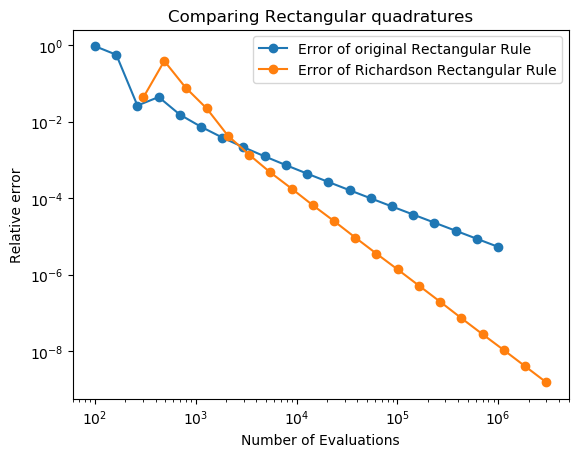

In [28]:
loglog(EvalsRT, errRectangular,"o-", label="Error of original Rectangular Rule");
loglog(REvalsRT, errRRectangular,"o-", label="Error of Richardson Rectangular Rule");
title("Comparing Rectangular quadratures");
xlabel("Number of Evaluations");
ylabel("Relative error");
legend();

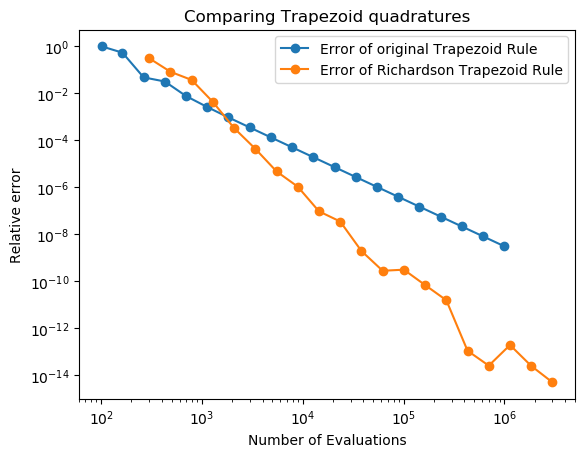

In [32]:
loglog(EvalsRT, errTrapezoid,"o-", label="Error of original Trapezoid Rule");
loglog(REvalsRT, errRTrapezoid,"o-", label="Error of Richardson Trapezoid Rule");
title("Comparing Trapezoid quadratures");
xlabel("Number of Evaluations");
ylabel("Relative error");
legend();

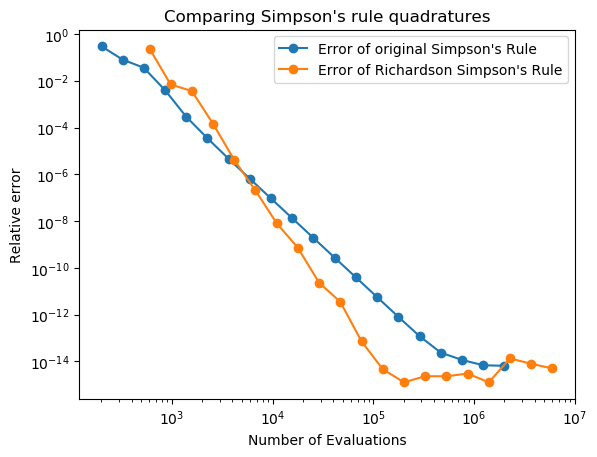

In [34]:
loglog(EvalsS, errSimpsons,"o-", label="Error of original Simpson's Rule");
loglog(REvalsS, errRSimpsons,"o-", label="Error of Richardson Simpson's Rule");
title("Comparing Simpson's rule quadratures");
xlabel("Number of Evaluations");
ylabel("Relative error");
legend();

### Problem 3

a) From the first order taylor approximation of $f$ around $x_n$ we get that for small enough $f(x_n)$, 

$$ f(x + f(x_n)) = f(x_n) + f(x_n)f'(x_n) + O((f(x_n))^2) \approx f(x_n) + f(x_n)f'(x_n)$$

Rearranging the terms we have that 

$$ \frac{f(x + f(x_n)) - f(x_n)}{f(x_n)} \approx f'(x_n)$$

This is a forward difference stencil with a stepsize $f(x_n)$

b) For convenience, set $f(x_n) = f_n$. Consider the Taylor series of $f$ around the root $x_0$: 

$$ f(x_n + f_n) \approx f'(x_0)(\epsilon_n + f_n) + O(\epsilon_{n}^{2})$$

Then 

$$ g_n = \frac{f'(x_0)(\epsilon_n + f_n) + O(\epsilon_{n}^{2}) - f'(x_0)(\epsilon_n) + O(\epsilon_{n}^{2})}{f_n} $$

$$ = \frac{f'(x_0)f_n + O(\epsilon_{n}^{2})}{f_n} $$

$$ = f'(x_0) + O(\epsilon_{n}^{2}/f_n) = f'(x_0) + O(\epsilon_{n}^{2}) $$

Now 

$$ \epsilon_{n+1} = x_{n+1} - x_0 = x_{n+1} - x_n + x_n - x_0 = \epsilon_n - f'(x_0) + O(\epsilon_{n}^{2}) \approx O(\epsilon^2_{n}) $$

Thus, this is a quadratic method. 

### Problem 4

In [133]:
using ReverseDiff

function newton_nd(f, x0; N=1000, ϵ=√eps())
    xs = [x0]
    J(x) = ReverseDiff.jacobian(f,x)
    for i=1:N
        # backslash operator solves linear system
        push!(xs, xs[end] .- (J(xs[end]) \ f(xs[end])))
        
        # convergence tolerance
        if norm(xs[end] - xs[end-1]) < ϵ*norm(xs[end])
            break
        end
    end
    
    return hcat(xs...)'
end



newton_nd (generic function with 2 methods)

In [130]:
f(x) = [3*x[1]^2 - x[2]^2; 3x[1]x[2]^2 - x[1]^3 - 1]
y0 = [1.0;5.0]
root = reshape(newton_nd(f, y0)[end,:], (1,2))
println("A root occurs at ", root)

A root occurs at [0.5 0.866025]


In [132]:
g(x) = [6x[1]-2*cos(x[2]*x[3]); 9*x[2] + sqrt(x[1]^2 + sin(x[3])+1.06) + 0.9; 60*x[3] + 3*exp(-x[1]*x[2]) + 10*pi - 3]
y1 = [1.0;5.0;1.0]

#newton_nd(g, y1)
root = reshape(newton_nd(g, y1)[end,:], (1,3))
println("A root occurs at ", root)

A root occurs at [0.331651 -0.190756 -0.526864]


### Problem 5

In [107]:
using LinearAlgebra
using ReverseDiff

Q = [4.0 -2.0; -2.0 3.0]
b = [2.0;3.0]
f(x) = (0.5)*x'*Q*x - b'*x
#∇f(x) = ReverseDiff.gradient(f,x)
gradf(x) = Q*x - b
x0 = [-4.0;-3.0]
#α=0.1
#α = ((∇f(x0))'*Q*x0 - b'*∇f(x0))/((∇f(x0))'*Q*∇f(x0))
α=(∇f(x0))'*(∇f(x0))/((∇f(x0))'*Q*∇f(x0))
x1 = x0 - α*∇f(x0)
Vals = [x0]
while norm(x1 - x0)/norm(x0) >= 10.0^(-8)

    x0 = x1
    α = (gradf(x0))'*(gradf(x0))/((gradf(x0))'*Q*gradf(x0))
    #α=(∇f(x0))'*(∇f(x0))/((∇f(x0))'*Q*∇f(x0))
    x1 = x0 - (α*gradf(x0))
    push!(Vals,x1)
end



In [108]:
Vals = hcat(Vals...)

2×34 Array{Float64,2}:
 -4.0  -0.210164  1.17179   0.968244  …  1.5  1.5  1.5  1.5  1.5  1.5  1.5
 -3.0   0.445306  0.905956  1.51659      2.0  2.0  2.0  2.0  2.0  2.0  2.0

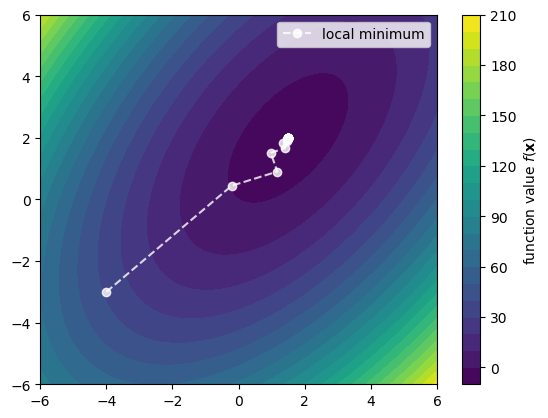

PyObject <matplotlib.legend.Legend object at 0x16ae0f668>

In [109]:
using PyPlot

figure()

# grid on which we plot f(x)
n = 100
xs = LinRange(-6, 6, n)
ys = LinRange(-6, 6, n)

xgrid = repeat(xs', n, 1)
ygrid = repeat(ys, 1, n)

z = zeros(n, n)

for i in 1:n
    for j in 1:n
        z[i,j] = f([xgrid[i,j]; ygrid[i,j]])
    end
end

# Contour plot
contourf(xgrid, ygrid, z, 20)
plot(Vals[1,:], Vals[2,:], "wo--", alpha=.8, label="local minimum")

colorbar(label=L"function value $f(\mathbf{x})$")
legend()

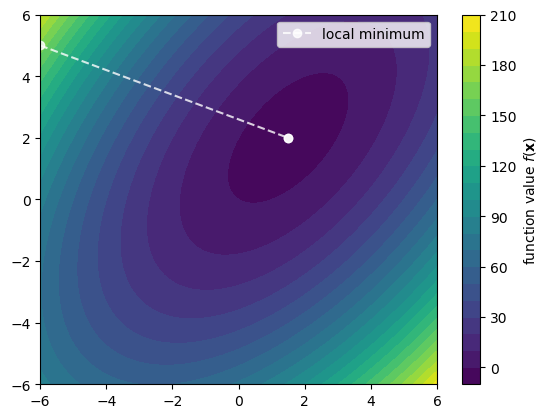

In [85]:

x0 = [-6.0,5.0]
Sols = newton_nd(∇f, x0)

figure()

# grid on which we plot f(x)
n = 100
xs = LinRange(-6, 6, n)
ys = LinRange(-6, 6, n)

xgrid = repeat(xs', n, 1)
ygrid = repeat(ys, 1, n)

z = zeros(n, n)

for i in 1:n
    for j in 1:n
        z[i,j] = f([xgrid[i,j]; ygrid[i,j]])
    end
end

# Contour plot
contourf(xgrid, ygrid, z, 20)
plot(Sols[:,1], Sols[:,2],alpha = 0.8,"wo--", label="local minimum")

colorbar(label=L"function value $f(\mathbf{x})$")
legend();

Newton's rule completes the solution in one step. This is because the function we are optimizing is quadratic, so its Hessian is a constant, and does not depend on the initial value. This is clarified in the following computation: 

$$ f = \frac{1}{2}\sum_{i,j}^{n} a_{ij}x_ix_j - \sum_{i=1}^{n}b_ix_i $$

$$ \implies f_{x_k} = \sum_{j}^{n} a_{kj}x_j - b_k \implies \nabla f = Q\textbf{x} - \textbf{b}$$

Thus, 

$$ [H]_{km} = [\nabla^2]_{km} = \frac{\partial}{\partial x_m}\sum_{j}^{n} a_{kj}x_j - b_k = a_{km} \implies \nabla^2 f = Q $$

In newton's method to find $\textbf{x}$ s.t. $\nabla f(\textbf{x}) = 0$ we get the following method: 

$$ \textbf{x}_{n+1} = \textbf{x}_n - H^{-1}\nabla f(\textbf{x}_n) $$

Setting the initial value as $\textbf{x}_0$ we have that 

$$\textbf{x}_1 = \textbf{x}_0 - Q^{-1}\nabla f(\textbf{x}_0) = \textbf{x}_0 - Q^{-1}(Q\textbf{x}_0 - \textbf{b}) = \textbf{x}_0 - \textbf{x}_0 + Q^{-1}\textbf{b} = Q^{-1}\textbf{b}$$

$$\textbf{x}_{2} = Q^{-1}\textbf{b} - Q^{-1}(Q(Q^{-1}\textbf{b}) - b) = Q^{-1}\textbf{b} - Q^{-1}(\textbf{b} - \textbf{b}) = Q^{-1}\textbf{b}$$ 

Thus, $Q^{-1}\textbf{b}$ is a fixed point of this iteration and it is reached after the first iteration. That is why Newton's method does it in one go. 